# Import the Libraries

In [2]:
import pandas as pd
import numpy as np
import nltk
import re
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Read the file

In [3]:
df =pd.read_excel(r'C:\Users\cflun\Desktop\Data Analyst 2023\Vast Data\KAggle Data\SuperMarket\superstore.xlsx') 
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,423-57-2993,B,Mandalay,Normal,Male,Fashion accessories,93.39,6,28.0170,588.3570,2019-03-27,19:18,Ewallet,560.34,4.761905,28.0170,10.0
1,285-68-5083,C,Naypyitaw,Member,Female,Sports and travel,24.74,3,3.7110,77.9310,2019-02-15,17:47,Credit card,74.22,4.761905,3.7110,10.0
2,347-34-2234,B,Mandalay,Member,Female,Sports and travel,55.07,9,24.7815,520.4115,2019-02-03,13:40,Ewallet,495.63,4.761905,24.7815,10.0
3,725-56-0833,A,Yangon,Normal,Female,Health and beauty,32.32,10,16.1600,339.3600,2019-02-20,16:49,Credit card,323.20,4.761905,16.1600,10.0
4,866-70-2814,B,Mandalay,Normal,Female,Electronic accessories,52.79,10,26.3950,554.2950,2019-02-25,11:58,Ewallet,527.90,4.761905,26.3950,10.0


In [4]:
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,423-57-2993,B,Mandalay,Normal,Male,Fashion accessories,93.39,6,28.0170,588.3570,2019-03-27,19:18,Ewallet,560.34,4.761905,28.0170,10.0
1,285-68-5083,C,Naypyitaw,Member,Female,Sports and travel,24.74,3,3.7110,77.9310,2019-02-15,17:47,Credit card,74.22,4.761905,3.7110,10.0
2,347-34-2234,B,Mandalay,Member,Female,Sports and travel,55.07,9,24.7815,520.4115,2019-02-03,13:40,Ewallet,495.63,4.761905,24.7815,10.0
3,725-56-0833,A,Yangon,Normal,Female,Health and beauty,32.32,10,16.1600,339.3600,2019-02-20,16:49,Credit card,323.20,4.761905,16.1600,10.0
4,866-70-2814,B,Mandalay,Normal,Female,Electronic accessories,52.79,10,26.3950,554.2950,2019-02-25,11:58,Ewallet,527.90,4.761905,26.3950,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,836-82-5858,B,Mandalay,Member,Male,Health and beauty,69.37,9,31.2165,655.5465,2019-01-26,19:14,Ewallet,624.33,4.761905,31.2165,4.0
996,730-61-8757,B,Mandalay,Member,Male,Health and beauty,51.13,4,10.2260,214.7460,2019-01-25,10:11,Credit card,204.52,4.761905,10.2260,4.0
997,828-46-6863,A,Yangon,Member,Male,Food and beverages,98.53,6,29.5590,620.7390,2019-01-23,11:22,Credit card,591.18,4.761905,29.5590,4.0
998,651-96-5970,A,Yangon,Normal,Male,Fashion accessories,46.41,1,2.3205,48.7305,2019-03-03,20:06,Credit card,46.41,4.761905,2.3205,4.0


In [5]:
df.tail(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
995,836-82-5858,B,Mandalay,Member,Male,Health and beauty,69.37,9,31.2165,655.5465,2019-01-26,19:14,Ewallet,624.33,4.761905,31.2165,4.0
996,730-61-8757,B,Mandalay,Member,Male,Health and beauty,51.13,4,10.2260,214.7460,2019-01-25,10:11,Credit card,204.52,4.761905,10.2260,4.0
997,828-46-6863,A,Yangon,Member,Male,Food and beverages,98.53,6,29.5590,620.7390,2019-01-23,11:22,Credit card,591.18,4.761905,29.5590,4.0
998,651-96-5970,A,Yangon,Normal,Male,Fashion accessories,46.41,1,2.3205,48.7305,2019-03-03,20:06,Credit card,46.41,4.761905,2.3205,4.0
999,885-56-0389,C,Naypyitaw,Member,Male,Fashion accessories,52.35,1,2.6175,54.9675,2019-02-12,17:49,Cash,52.35,4.761905,2.6175,4.0


In [6]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

# Knowing  More About the data 

In [7]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.309222e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


# Count the Number of Rows(Data) Present in different columns 

In [8]:
df.count()

Invoice ID                 1000
Branch                     1000
City                       1000
Customer type              1000
Gender                     1000
Product line               1000
Unit price                 1000
Quantity                   1000
Tax 5%                     1000
Total                      1000
Date                       1000
Time                       1000
Payment                    1000
cogs                       1000
gross margin percentage    1000
gross income               1000
Rating                     1000
dtype: int64

# To Check data type and If there's any Null values present in any column

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   object        
 12  Payment                  1000 non-n

# To know just Data Type

In [10]:
df.dtypes

Invoice ID                         object
Branch                             object
City                               object
Customer type                      object
Gender                             object
Product line                       object
Unit price                        float64
Quantity                            int64
Tax 5%                            float64
Total                             float64
Date                       datetime64[ns]
Time                               object
Payment                            object
cogs                              float64
gross margin percentage           float64
gross income                      float64
Rating                            float64
dtype: object

# If there's any duplicate values present

In [11]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [12]:
df.duplicated().sum()

0

# Column Null Values Check If there's any

In [13]:
df.isna().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

array([[<AxesSubplot:title={'center':'Unit price'}>,
        <AxesSubplot:title={'center':'Quantity'}>,
        <AxesSubplot:title={'center':'Tax 5%'}>],
       [<AxesSubplot:title={'center':'Total'}>,
        <AxesSubplot:title={'center':'Date'}>,
        <AxesSubplot:title={'center':'cogs'}>],
       [<AxesSubplot:title={'center':'gross margin percentage'}>,
        <AxesSubplot:title={'center':'gross income'}>,
        <AxesSubplot:title={'center':'Rating'}>]], dtype=object)

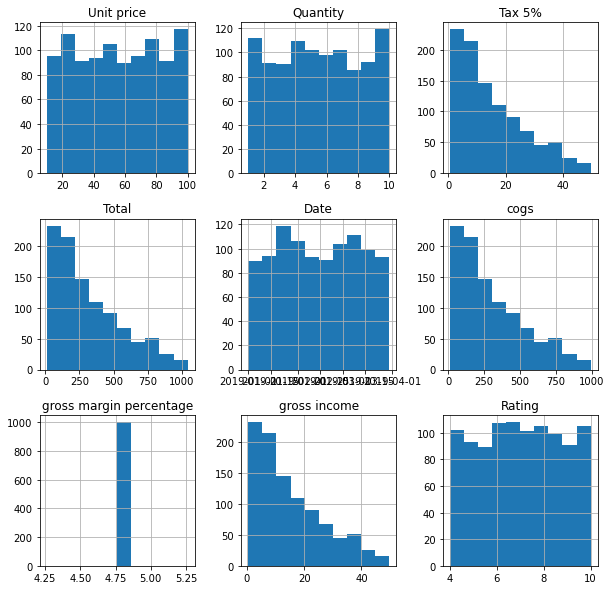

In [14]:
df.hist(figsize=(10,10))

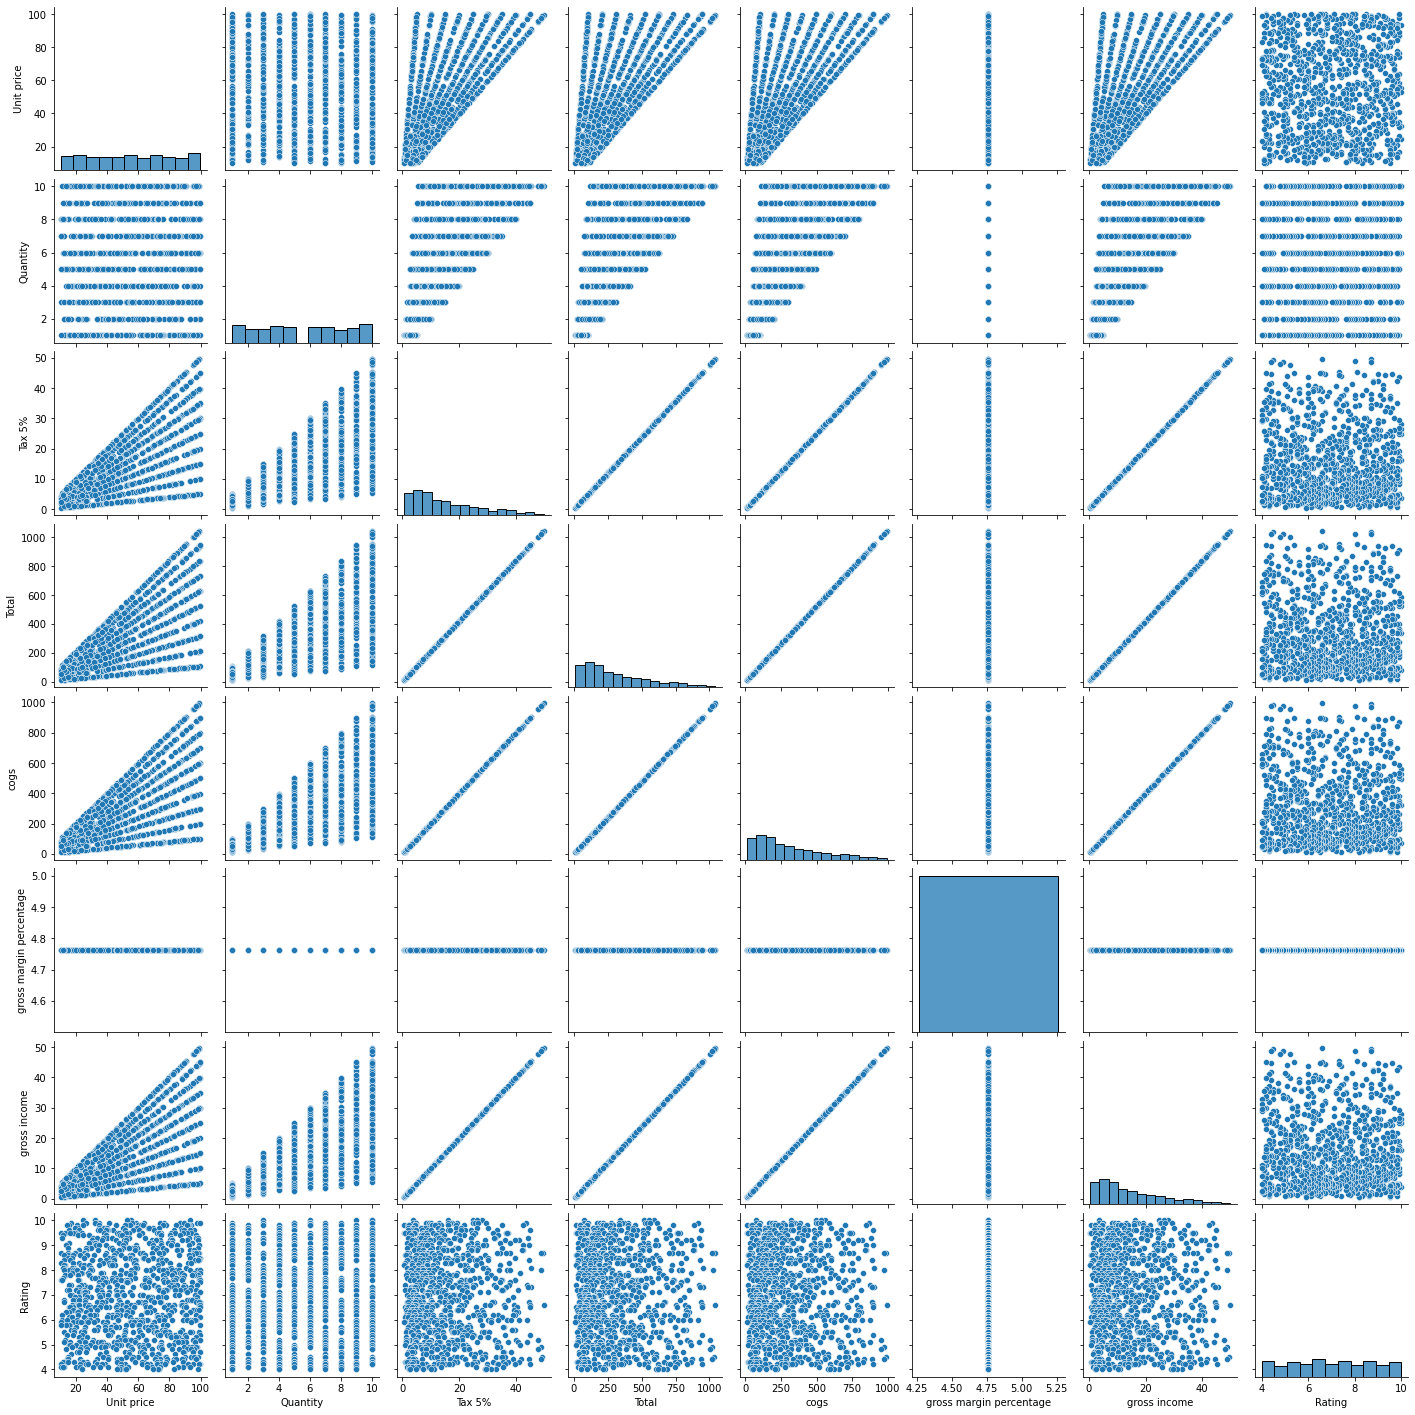

In [15]:
sns.pairplot(df)

In [16]:
df['day'] = (df['Date']).dt.day
df['Month'] = (df['Date']).dt.month
df['year'] = (df['Date']).dt.year

In [17]:
df['Time'] =pd.to_datetime(df['Time'])

In [18]:
df['Hour']=(df['Time']).dt.hour

In [19]:
df['Minute']=(df['Time']).dt.minute

In [20]:
df['Second']=(df['Time']).dt.second

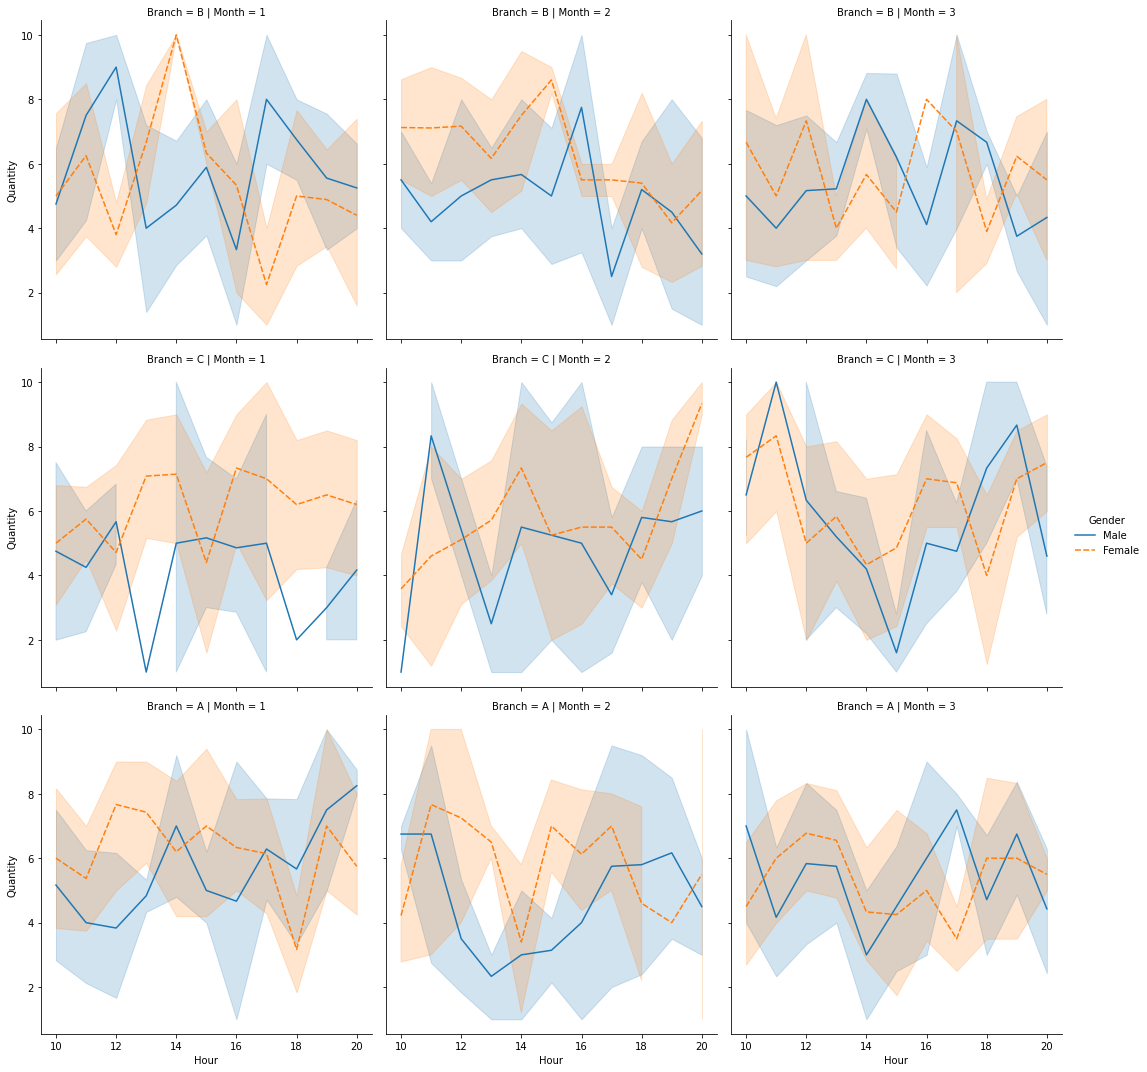

In [21]:

genderCount  = sns.relplot(x="Hour",  y = 'Quantity', col= 'Month' , row= 'Branch', kind="line", hue="Gender", style="Gender", data =df)

# Counting the number of Male/Female

In [22]:
#Male and Female Count
Male_count = df['Gender'].value_counts()['Male']
Female_count = df['Gender'].value_counts()['Female']

print('Male customers:', Male_count)
print('Female customers:', Female_count)

Male customers: 457
Female customers: 543


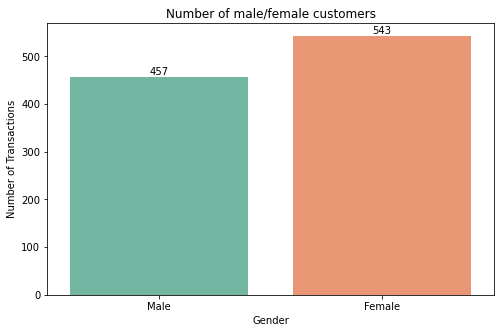

In [23]:
fig = plt.figure(figsize=(8,5)) 

ax = sns.countplot(x=df['Gender'],palette = 'Set2')

plt.xlabel('Gender')
plt.ylabel('Number of Transactions')
plt.title('Number of male/female customers')


# Annotating the bar graph
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom')

plt.show()

# Different Mode of Payments (Gender Wise)

In [24]:
Ewallet_Count = df['Payment'].value_counts()['Ewallet']
print('Number of Ewallet Transactions: ',Ewallet_Count)

Cash_Price_Count = df['Payment'].value_counts()['Cash']
print('Number of Cash Transactions: ',Cash_Price_Count)

Credit_Card_Count = df['Payment'].value_counts()['Credit card']
print('Number of Credit Card Transactions: ',Credit_Card_Count)

Number of Ewallet Transactions:  390
Number of Cash Transactions:  323
Number of Credit Card Transactions:  287


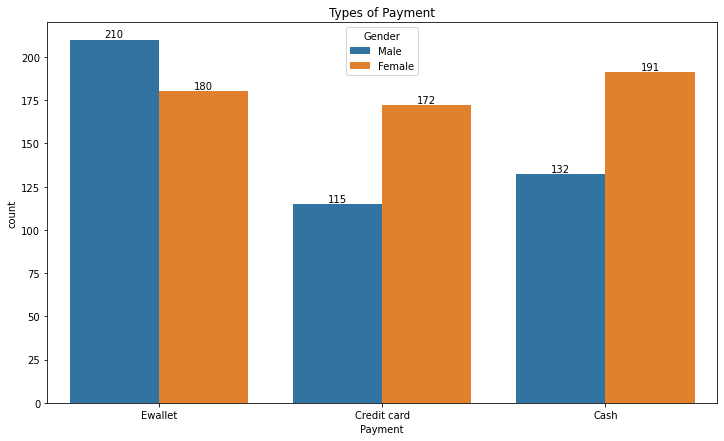

In [25]:
plt.figure(figsize=(12, 7))
plt.title('Types of Payment')
plt.ylim(0,220)
sns.countplot(x=df['Payment'], hue=df['Gender'])

# Annotate the bars with male and female values
for p in plt.gca().patches:
    height = p.get_height()
    if height > 0:  # Exclude bars with a count of 0
        plt.gca().annotate(str(height), (p.get_x() + p.get_width() / 2, height),
                           ha='center', va='bottom')

plt.show()

In [26]:
#Total Members and Normal Customers
Member = df['Customer type'].value_counts()['Member']
Normal = df['Customer type'].value_counts()['Normal']

print('Number of Members Customer Type: ',Member)
print('Number of Normal Customer Type: ',Normal)

Number of Members Customer Type:  496
Number of Normal Customer Type:  504


In [27]:
Product_Category_counts = df['Product line'].value_counts()
Product_Category_counts

Fashion accessories       228
Health and beauty         175
Sports and travel         168
Electronic accessories    161
Home and lifestyle        150
Food and beverages        118
Name: Product line, dtype: int64

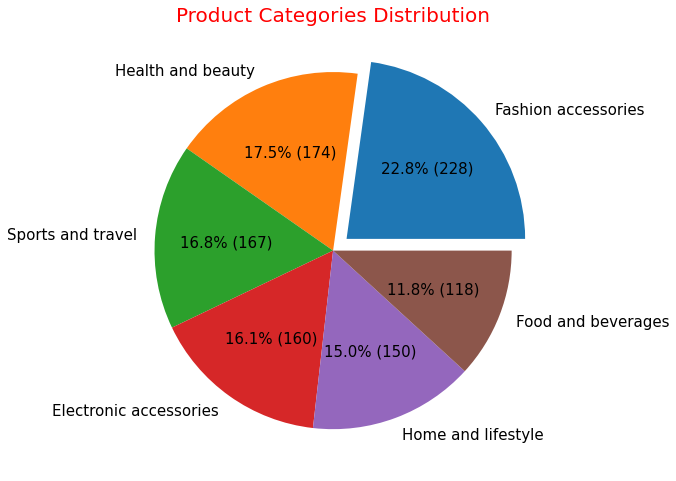

In [28]:
product_line_counts = df['Product line'].value_counts()

# Create a pie chart
palette_color = sns.color_palette('bright')
plt.figure(figsize=(8,10))
explode=[0.10,0.0,0.0,0.0,0.0,0.0]
plt.pie(product_line_counts, labels=product_line_counts.index, autopct=lambda pct: f'{pct:.1f}% ({int(pct/100*product_line_counts.sum())})',textprops={'fontsize': 15},explode=explode)


# Set the title
plt.title('Product Categories Distribution',fontsize=20,color='red')

# Display the chart
plt.show()

# Ratings

In [29]:
df['Rating'].max()

10.0

In [30]:
df['Rating'].min()

4.0

# Avg Rating

In [31]:
Avg_rating= df['Rating'].mean()
Avg_rating

6.972699999999996

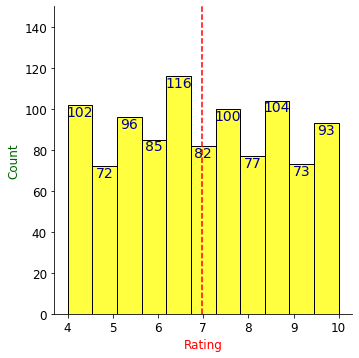

In [32]:
sns.displot(x=df['Rating'],color='yellow')
plt.axvline(x=np.mean(df['Rating']),c='red',ls='--',label='mean')

plt.xlabel('Rating',color='red',fontsize=12)
plt.ylabel('Count',color='darkgreen',fontsize=12)

plt.ylim(0,150)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Annotate the bars with values
for p in plt.gca().patches:
    height = p.get_height()
    if height > 0:  # Exclude bars with a count of 0
        plt.gca().annotate(str(height), (p.get_x() + p.get_width() / 2, height),fontsize=14,color='darkblue',
                           ha='center', va='top')

plt.show()

# Highest Rating Information

In [33]:
max_rating = df["Rating"].max()
highest_rating_details = df[df["Rating"] == max_rating].value_counts().sum()
print(highest_rating_details)

5


In [34]:
highest_rating_details = df[df["Rating"] == max_rating].value_counts().reset_index().sort_values(by=['Date'])
highest_rating_details

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,gross margin percentage,gross income,Rating,day,Month,year,Hour,Minute,Second,0
1,347-34-2234,B,Mandalay,Member,Female,Sports and travel,55.07,9,24.7815,520.4115,...,4.761905,24.7815,10.0,3,2,2019,13,40,0,1
0,285-68-5083,C,Naypyitaw,Member,Female,Sports and travel,24.74,3,3.7110,77.9310,...,4.761905,3.7110,10.0,15,2,2019,17,47,0,1
3,725-56-0833,A,Yangon,Normal,Female,Health and beauty,32.32,10,16.1600,339.3600,...,4.761905,16.1600,10.0,20,2,2019,16,49,0,1
4,866-70-2814,B,Mandalay,Normal,Female,Electronic accessories,52.79,10,26.3950,554.2950,...,4.761905,26.3950,10.0,25,2,2019,11,58,0,1
2,423-57-2993,B,Mandalay,Normal,Male,Fashion accessories,93.39,6,28.0170,588.3570,...,4.761905,28.0170,10.0,27,3,2019,19,18,0,1


In [35]:
df['Year'] = df['Date'].dt.strftime('%Y')
df['Month'] = df['Date'].dt.strftime('%m')

max_rating = df["Rating"].max()

# Get the details of the highest rating
highest_rating_details = df[df["Rating"] == max_rating].sort_values(by=['Date'])

# Get the product line
product_line = highest_rating_details["Product line"].values[0]

# Get the gender
gender = highest_rating_details["Gender"].values[0]

# Get the customer type
customer_type = highest_rating_details["Customer type"].values[0]

# Get the month from date
month = highest_rating_details["Month"].values[0]

# Get the gross margin
gross_margin = highest_rating_details["gross margin percentage"].values[0] * highest_rating_details["Total"].values[0] / 100

# Get the quantity
quantity = highest_rating_details["Quantity"].values[0]

# Print the details
print("Max Rating:", max_rating)
print("Product line:", product_line)
print("Gender:", gender)
print("Customer type:", customer_type)
print("Month:", month)
print("Gross margin:", gross_margin)
print("Quantity:", quantity)


Max Rating: 10.0
Product line: Sports and travel
Gender: Female
Customer type: Member
Month: 02
Gross margin: 24.781500000495626
Quantity: 9


# Average Rating Month Wise

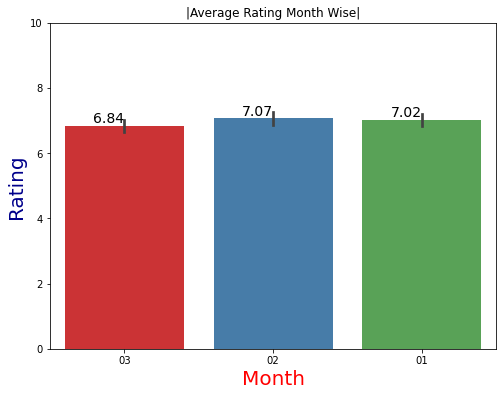

In [36]:
df['Month'] = df['Date'].dt.strftime('%m')

# Set the labels and title
plt.figure(figsize=(8,6))
plt.ylim(0,10)
plt.xlabel('Month',horizontalalignment='center',color='red',fontsize=20)
plt.ylabel('Average Rating',horizontalalignment='center',color='darkblue',fontsize=20)
plt.title('|Average Rating Month Wise|')

sns.barplot(data=df, x='Month', y='Rating', palette='Set1')


# Annotate the values
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2, p.get_height()),fontsize=14, ha='right', va='bottom')



# Display the graph
plt.show()

# Averge Rating Date Wise

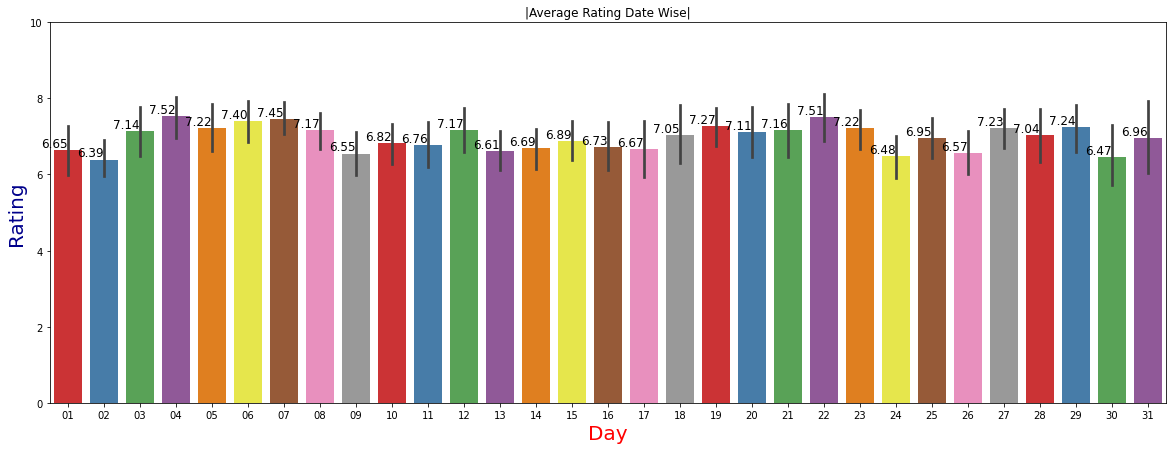

In [37]:
# Sort the DataFrame by date
df_sorted = df.sort_values(by='Date')

# Extract the day from the date
df_sorted['Day'] = df_sorted['Date'].dt.strftime('%d')



# Set the labels and title
plt.figure(figsize=(20,7))
plt.ylim(0,10)
plt.xlabel('Day',horizontalalignment='center',color='red',fontsize=20)
plt.ylabel('Average Rating',horizontalalignment='center',color='darkblue',fontsize=20)
plt.title('|Average Rating Date Wise|')

ax = sns.barplot(data=df_sorted, x='Day', y='Rating', palette='Set1')
plt.xticks(fontsize=10)

# Annotate the values
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2, p.get_height()),fontsize=12, ha='right', va='bottom')
    

# Display the graph
plt.show()

# Whether there's a relation between Total sales and Ratings

Text(0.5, 1.0, 'Relationship between Total vs Customer Ratings')

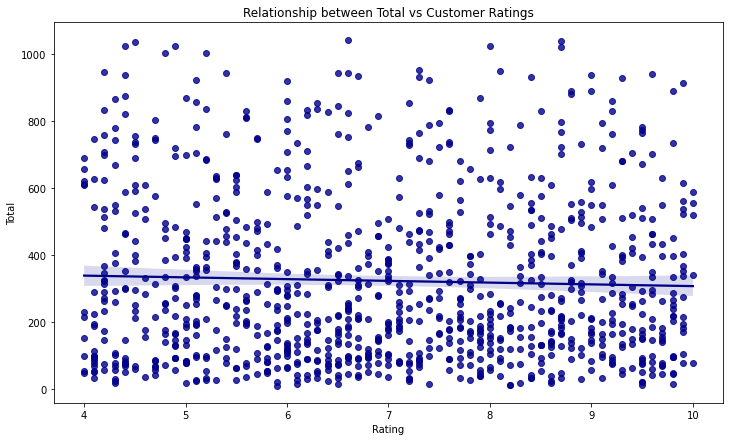

In [38]:
x=df["Rating"]
y=df["Total"]
plt.figure(figsize=(12, 7))
sns.regplot(x=df["Rating"],y=df["Total"],color='darkblue')
plt.title('Relationship between Total vs Customer Ratings')

# Total Sales per Branch

Text(0.5, 1.0, 'Total Sales per Branch')

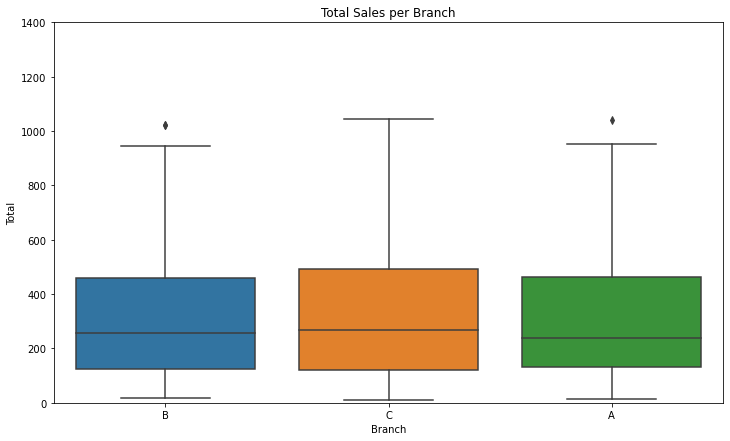

In [39]:
plt.figure(figsize=(12, 7))
plt.ylim(0,1400)
sns.boxplot(x=df['Branch'],y=df['Total'])
plt.title('Total Sales per Branch')

# Product Categories vs Average Rating wrt customer type(Normal,Member)

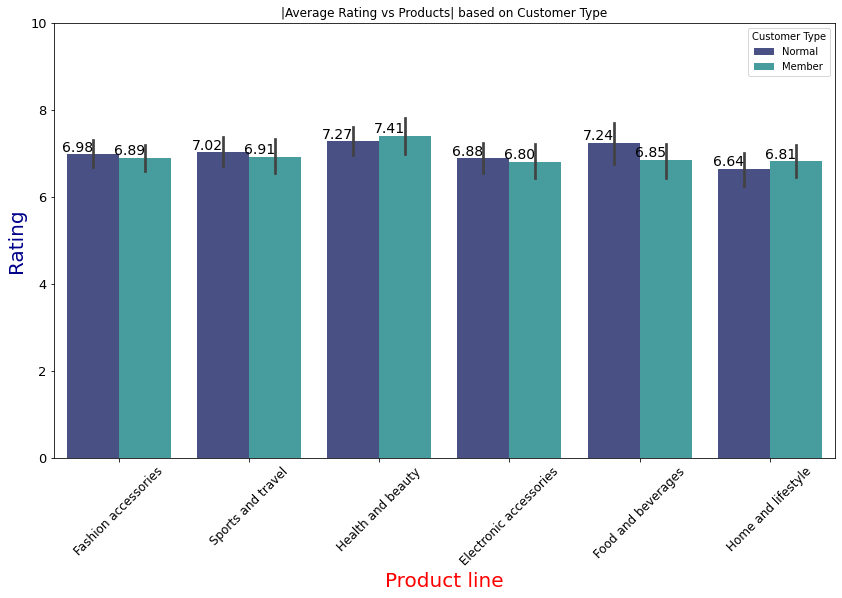

In [40]:

# Set the labels and title

plt.figure(figsize=(14,8))
plt.ylim(0,10)
plt.xlabel('Product line',horizontalalignment='center',color='red',fontsize=20)
plt.ylabel('Average Rating',horizontalalignment='center',color='darkblue',fontsize=20)
plt.title('|Average Rating vs Products| based on Customer Type')


sns.barplot(data=df, x='Product line', y='Rating', hue='Customer type', palette='mako')

# Show the legend
plt.legend(title='Customer Type')
plt.xticks(rotation=45,fontsize=12)
plt.yticks(fontsize=13)
# Annotate the values
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2, p.get_height()),fontsize=14, ha='right', va='bottom')



# Display the graph
plt.show()

# Product Category Comparison wrt sales

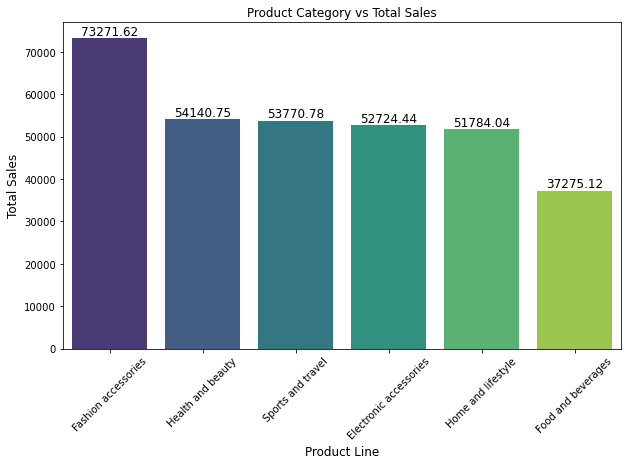

In [41]:
# Create a new DataFrame with the product line and gross income columns
df_product_gross = df[['Product line', 'Total']]

# Group the data by product line and calculate the sum of gross income for each product line
grouped_data = df_product_gross.groupby('Product line')['Total'].sum().reset_index()

# Sort the data by gross income in descending order
sorted_data = grouped_data.sort_values('Total', ascending=False)

# Create the bar plot

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=sorted_data, x='Product line', y='Total', palette='viridis')


# Annotate the values on top of each bar
for i, value in enumerate(sorted_data['Total']):
    plt.text(i, value, f'{value:.2f}',fontsize=12, ha='center', va='bottom')

# Set the labels and title
plt.xlabel('Product Line',horizontalalignment='center',fontsize=12)
plt.ylabel('Total Sales',horizontalalignment='center',fontsize=12)
plt.title('Product Category vs Total Sales')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()

# Product category Comparison wrt to gross income

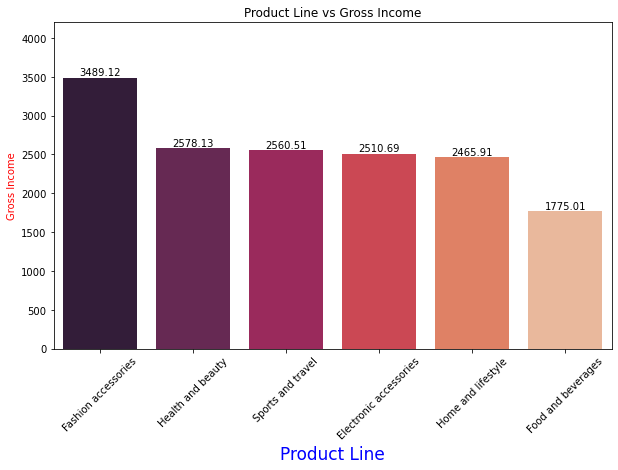

In [42]:
# Create a new DataFrame with the product line and gross income columns
df_product_gross = df[['Product line', 'gross income']]

# Group the data by product line and calculate the sum of gross income for each product line
grouped_data = df_product_gross.groupby('Product line')['gross income'].sum().reset_index()

# Sort the data by gross income in descending order
sorted_data = grouped_data.sort_values('gross income', ascending=False)

# Create the bar plot

plt.figure(figsize=(10, 6))
plt.ylim(0,4200)
ax = sns.barplot(data=sorted_data, x='Product line', y='gross income', palette='rocket')


# Annotate the values on top of each bar
for i, value in enumerate(sorted_data['gross income']):
    plt.text(i, value, f'{value:.2f}', ha='center', va='bottom')

# Set the labels and title

plt.xlabel('Product Line',color='blue',fontsize=17)
plt.ylabel('Gross Income',horizontalalignment='center',color='red')
plt.title('Product Line vs Gross Income')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)


# Display the plot
plt.show()

# Product Categories Month Wise Sales 

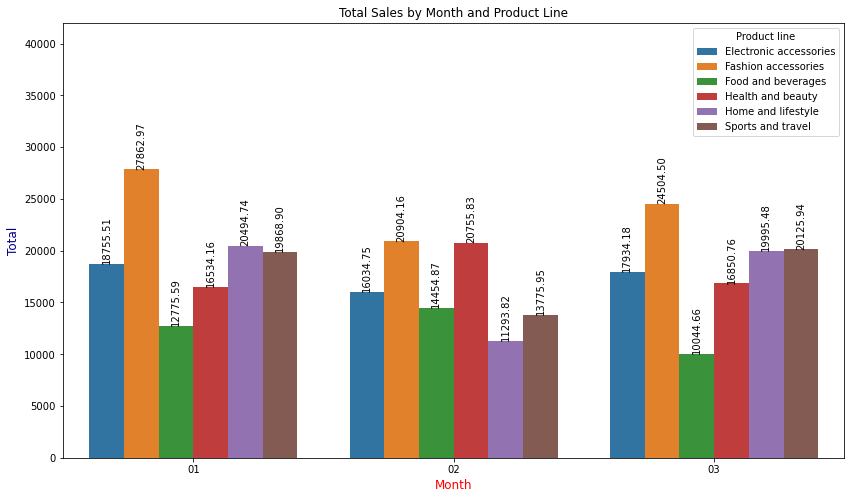

In [43]:
# Group the data by 'Month' and 'Product line' and calculate the total sales
sales_by_month_product = df.groupby(['Month', 'Product line'])['Total'].sum().reset_index()

# Set the labels and title
plt.figure(figsize=(14, 8))
plt.ylim(0,42000)
plt.xlabel('Month', horizontalalignment='center', color='red', fontsize=12)
plt.ylabel('Total Sales', horizontalalignment='center', color='darkblue', fontsize=12)
plt.title('Total Sales by Month and Product Line')

# Plot the bar graph
sns.barplot(data=sales_by_month_product, x='Month', y='Total', hue='Product line')

# Annotate the values
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2, p.get_height()), rotation=90, ha='center', va='bottom', fontsize=10)

# Display the graph
plt.show()

<AxesSubplot:>

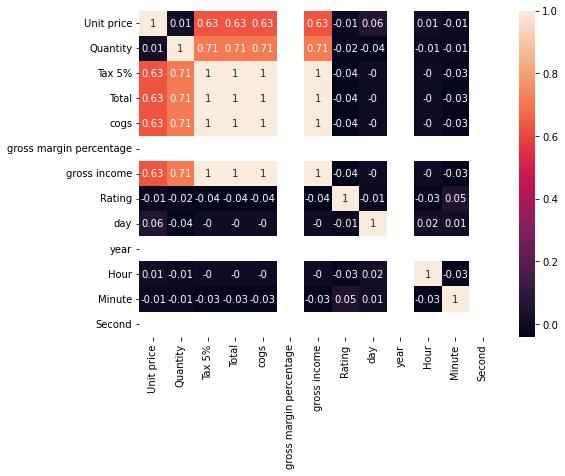

In [44]:
np.round(df.corr(),2)
plt.figure(figsize=(8, 6))

sns.heatmap(np.round(df.corr(),2),annot=True)


# Total Number of Brances

In [45]:
df['Branch'].value_counts()

B    359
A    335
C    306
Name: Branch, dtype: int64

# Plotted the Number of Branches

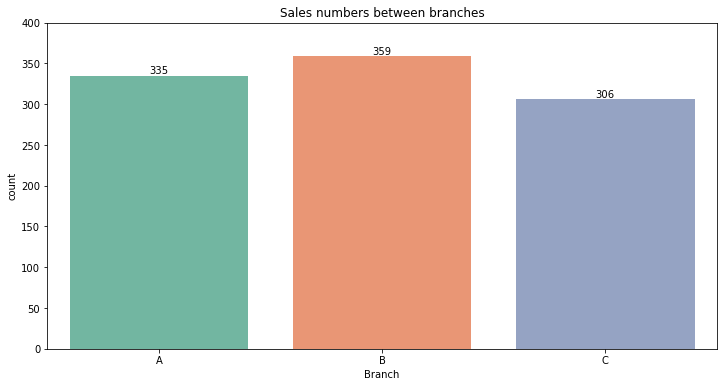

In [46]:
df_sorted= df.sort_values(by=['Branch'])

fig = plt.figure(figsize=(12,6)) 
plt.ylim(0, 400)
ax = sns.countplot(x=df_sorted['Branch'],palette = 'Set2')
plt.title('Sales numbers between branches')

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom')

plt.show()

# Total Sales By City

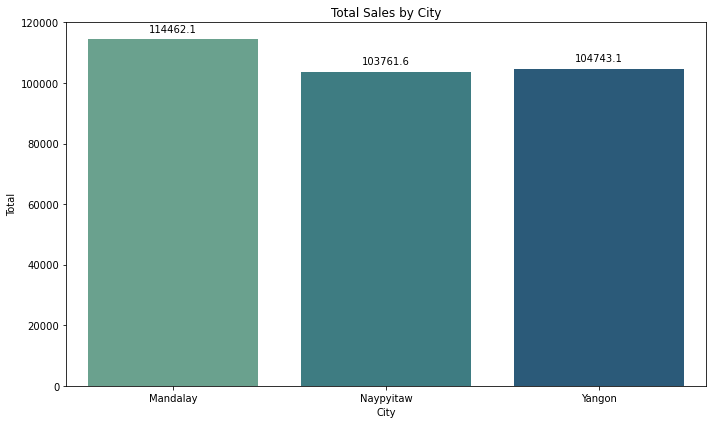

In [47]:
plt.figure(figsize=(10, 6))

# Set the title and labels
plt.title('Total Sales by City')
plt.ylim(0,120000)
plt.xlabel('City')
plt.ylabel('Total Sales')


# Plot the bar graph
ax=sns.barplot(x='City', y='Total', data=df, estimator=sum, ci=None,palette = 'crest')

# Annotate the values on the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')




# Display the plot
plt.tight_layout()
plt.show()

# Pie Chart of Different Products and there Numerical Values(Sum + Percentage)

# Types of Customers

In [48]:
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,gross margin percentage,gross income,Rating,day,Month,year,Hour,Minute,Second,Year
0,423-57-2993,B,Mandalay,Normal,Male,Fashion accessories,93.39,6,28.0170,588.3570,...,4.761905,28.0170,10.0,27,03,2019,19,18,0,2019
1,285-68-5083,C,Naypyitaw,Member,Female,Sports and travel,24.74,3,3.7110,77.9310,...,4.761905,3.7110,10.0,15,02,2019,17,47,0,2019
2,347-34-2234,B,Mandalay,Member,Female,Sports and travel,55.07,9,24.7815,520.4115,...,4.761905,24.7815,10.0,3,02,2019,13,40,0,2019
3,725-56-0833,A,Yangon,Normal,Female,Health and beauty,32.32,10,16.1600,339.3600,...,4.761905,16.1600,10.0,20,02,2019,16,49,0,2019
4,866-70-2814,B,Mandalay,Normal,Female,Electronic accessories,52.79,10,26.3950,554.2950,...,4.761905,26.3950,10.0,25,02,2019,11,58,0,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,836-82-5858,B,Mandalay,Member,Male,Health and beauty,69.37,9,31.2165,655.5465,...,4.761905,31.2165,4.0,26,01,2019,19,14,0,2019
996,730-61-8757,B,Mandalay,Member,Male,Health and beauty,51.13,4,10.2260,214.7460,...,4.761905,10.2260,4.0,25,01,2019,10,11,0,2019
997,828-46-6863,A,Yangon,Member,Male,Food and beverages,98.53,6,29.5590,620.7390,...,4.761905,29.5590,4.0,23,01,2019,11,22,0,2019
998,651-96-5970,A,Yangon,Normal,Male,Fashion accessories,46.41,1,2.3205,48.7305,...,4.761905,2.3205,4.0,3,03,2019,20,6,0,2019


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

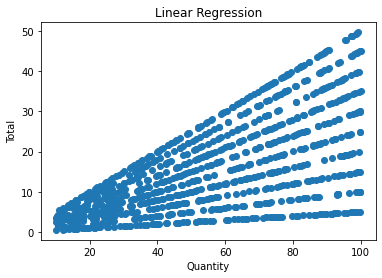

In [49]:
x = df["Unit price"].values
y = df["gross income"].values
plt.scatter(x,y)
plt.xlabel("Quantity")
plt.ylabel("Total")
plt.title("Linear Regression")
plt.plot